In [1]:
import xugrid as xu
import pandas as pd
import numpy as np
from itertools import compress

In [3]:
#load data with xarray
file_path = r"p:\archivedprojects\11205229-ecotopen-modellering\2022\01_Modelruns\DWSM_3D200m_2019\DFM_OUTPUT_DWSM-FM_200m\DWSM-FM_200m_0004_map.nc"
uda = xu.open_dataset(file_path)
print(uda)

<xarray.Dataset> Size: 10GB
Dimensions:                   (mesh2d_nNodes: 11328, mesh2d_nEdges: 22562,
                               mesh2d_nFaces: 11235, mesh2d_nMax_face_nodes: 4,
                               mesh2d_nLayers: 10, mesh2d_nInterfaces: 11,
                               time: 9001)
Coordinates:
    mesh2d_node_x             (mesh2d_nNodes) float64 91kB ...
    mesh2d_node_y             (mesh2d_nNodes) float64 91kB ...
    mesh2d_edge_x             (mesh2d_nEdges) float64 180kB ...
    mesh2d_edge_y             (mesh2d_nEdges) float64 180kB ...
    mesh2d_face_x             (mesh2d_nFaces) float64 90kB ...
    mesh2d_face_y             (mesh2d_nFaces) float64 90kB ...
  * time                      (time) datetime64[ns] 72kB 2018-12-22 ... 2020-...
  * mesh2d_nEdges             (mesh2d_nEdges) int64 180kB 0 1 2 ... 22560 22561
  * mesh2d_nNodes             (mesh2d_nNodes) int64 91kB 0 1 2 ... 11326 11327
  * mesh2d_nFaces             (mesh2d_nFaces) int64 90kB 0 1 2 ...

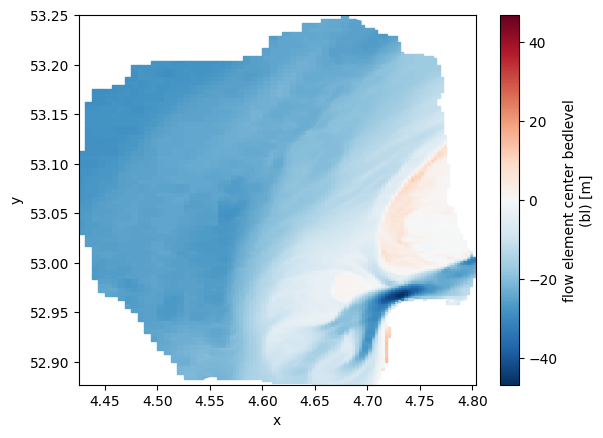

In [8]:
#view location (based on bathymetry)
uda["mesh2d_flowelem_bl"].ugrid.plot()

In [24]:
#Subset location
sub_file = uda.ugrid.sel(x=slice(4.71, 4.75), y=slice(53.07, 53.085))

#Subset time
sub_file = sub_file.ugrid.sel(time = slice('2019-06-01','2019-07-31'))

#Check
print(sub_file)

<xarray.Dataset> Size: 13MB
Dimensions:                   (mesh2d_nNodes: 112, mesh2d_nEdges: 202,
                               mesh2d_nFaces: 91, mesh2d_nMax_face_nodes: 4,
                               mesh2d_nLayers: 10, mesh2d_nInterfaces: 11,
                               time: 1464)
Coordinates:
    mesh2d_node_x             (mesh2d_nNodes) float64 896B ...
    mesh2d_node_y             (mesh2d_nNodes) float64 896B ...
    mesh2d_edge_x             (mesh2d_nEdges) float64 2kB ...
    mesh2d_edge_y             (mesh2d_nEdges) float64 2kB ...
    mesh2d_face_x             (mesh2d_nFaces) float64 728B ...
    mesh2d_face_y             (mesh2d_nFaces) float64 728B ...
  * time                      (time) datetime64[ns] 12kB 2019-06-01 ... 2019-...
  * mesh2d_nEdges             (mesh2d_nEdges) int64 2kB 0 1 2 3 ... 199 200 201
  * mesh2d_nNodes             (mesh2d_nNodes) int64 896B 0 1 2 3 ... 109 110 111
  * mesh2d_nFaces             (mesh2d_nFaces) int64 728B 0 1 2 3 ... 87 88 

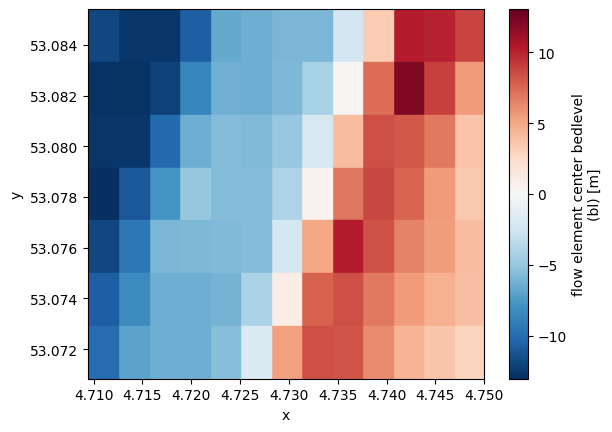

In [25]:
#view location sub_file (based on bathymetry)
sub_file["mesh2d_flowelem_bl"].ugrid.plot()

In [27]:
#write to file example
sub_file.ugrid.to_netcdf("testdata/ugrid_netcdf/delft3dfmflow_output_example_DWSM-FM_200m_0004_map.nc")